In [45]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Insight about Dataset**
**Features:** The dataset contains 31 numerical features, labeled as "V1" to "V28," which are the result of a dimensionality reduction technique called PCA (Principal Component Analysis) due to confidentiality reasons. Additionally, it includes the "Time" feature, representing the time elapsed between the first transaction and each transaction, and the "Amount" feature, representing the transaction amount.

**Target Variable:** The dataset includes a binary target variable called "Class." It takes the value 1 for fraudulent transactions and 0 for non-fraudulent transactions.

In [13]:
df=pd.read_csv("creditcard.csv")
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [14]:
df.shape

(284807, 31)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.loc[0]

Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64

# **Train Test dataset**

When doing Train-Test split ther are some unique aspects that may require attention.

**Class imbalance:** Since credit card fraud is relatively rare compared to legitimate transactions, the dataset might exhibit class imbalance, with a significantly larger number of non-fraudulent transactions compared to fraudulent ones. This imbalance can affect the model's performance and may require special handling during training.

**Feature scaling:** It's important to check if the features in the dataset are on similar scales. Some machine learning algorithms, such as logistic regression or neural networks, benefit from feature scaling. If the features are not on the same scale, it might be necessary to apply scaling techniques (e.g., standardization or normalization) to improve the model's performance.


In [17]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['Class'] = y_train

print("Train dataset:")
print(train_df.head())

Train dataset:
            Time        V1        V2        V3        V4        V5        V6  \
223361  143352.0  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197   
165061  117173.0 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310   
238186  149565.0  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429   
150562   93670.0 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270   
138452   82655.0 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406   

              V7        V8        V9  ...       V21       V22       V23  \
223361 -0.627978  0.035994  1.054560  ...  0.238197  0.968305  0.053208   
165061  0.017959 -0.401619  0.040378  ... -0.153485  0.421703  0.113442   
238186  0.787858  0.117276 -0.131275  ... -0.314638 -0.872959  0.083391   
150562  0.847902 -0.081323  0.371579  ...  0.063525  0.443431 -0.072754   
138452 -0.435632  1.313760  0.536044  ... -0.480691 -0.230369  0.250717   

             V24       V25       V26       V27       

In [19]:
train_df.shape

(227845, 31)

In [20]:
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['Class'] = y_test

print("Test dataset:")
print(test_df.head())

Test dataset:
            Time         V1        V2         V3        V4         V5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   

              V6         V7        V8        V9  ...       V21       V22  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ...  1.190739 -1.127670   
49906   1.015887  -0.524379  0.224060  0.899746  ... -0.213436 -0.942525   
29474   0.040444  -0.712567  0.002299 -0.971747  ...  0.102398  0.168269   
276481 -0.630647   0.276990  0.586025 -0.484715  ...  0.358932  0.873663   
278846 -0.956571   0.043241 -0.160746  0.363241  ... -0.238644 -0.616400   

             V23       V24       V25       V26       V27       V28  Amount  \
43428  -2.35

In [21]:
test_df.shape

(56962, 31)

# **Justification of not joining train and original dataset**

Merging the Train and Original datasets could lead to data leakage, as the model would have access to information from the test set during training. This can result in an overly optimistic evaluation of the model's performance. To ensure unbiased evaluation, it's important to keep the Train and Test datasets separate.

Therefore, in this case, it is recommended to focus on working with the Train and Test datasets separately, ensuring that any preprocessing, feature selection, or model training is performed only on the Train dataset. The Test dataset should be kept untouched until the final evaluation of the trained model.

# **Identifying and removing irrelevant features**

Here are two approaches to identify irrelevant features:

**Correlation analysis:** Analyse the correlation between each feature and the target variable. Features with low correlation or no meaningful relationship with the target variable may be considered irrelevant. In this dataset we have used correlation heatmap which have Class column as target variable. We clearly see that V22, V23, V24, V25 and V26 have low correlation with Class column so we can remove it.

**Feature importance:** Utilize techniques like feature importance estimation (e.g., through random forests or gradient boosting) to identify features that have a minimal impact on the target variable. WE used two type of feature importance methods.

1.**Coefficients as Feature Importance:** in this, linear algorithms find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score. We have used Logistic regression and we can see that Feature 22 (V22) and Feature 23 (V23) have minimal importance so we can remove it.

2.**Decision Tree Feature Importance:** Decision tree algorithms offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy. Using Random Forest Classifier with the feature importance we can see that Feature 22 (V22), Feature 23 (V23) and Feature 24 (V24) have minimal impact on the target variable so we can remove it.

So Overall, by heatmap correlation and feature importance we removed columns of V22, V23 and V24.


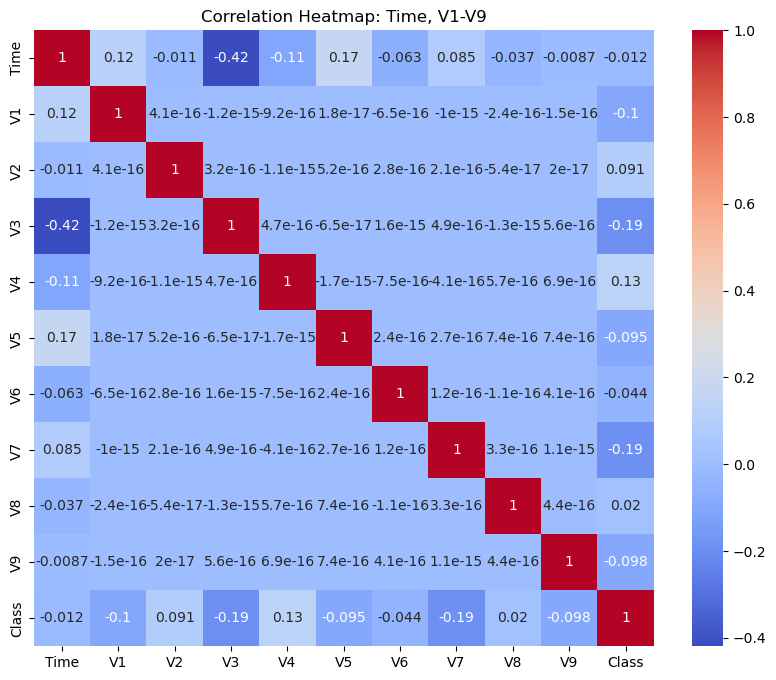

In [22]:
sel_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'Class']
sel_df = df[sel_columns]
correlation_matrix = sel_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Time, V1-V9')
plt.show()

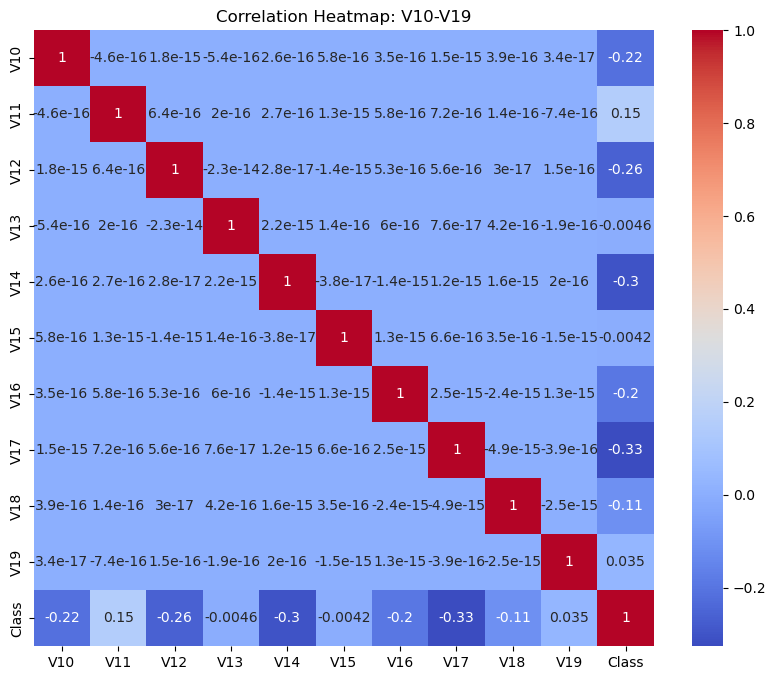

In [23]:
sel_columns = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'Class']
sel_df = df[sel_columns]
correlation_matrix = sel_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: V10-V19')
plt.show()

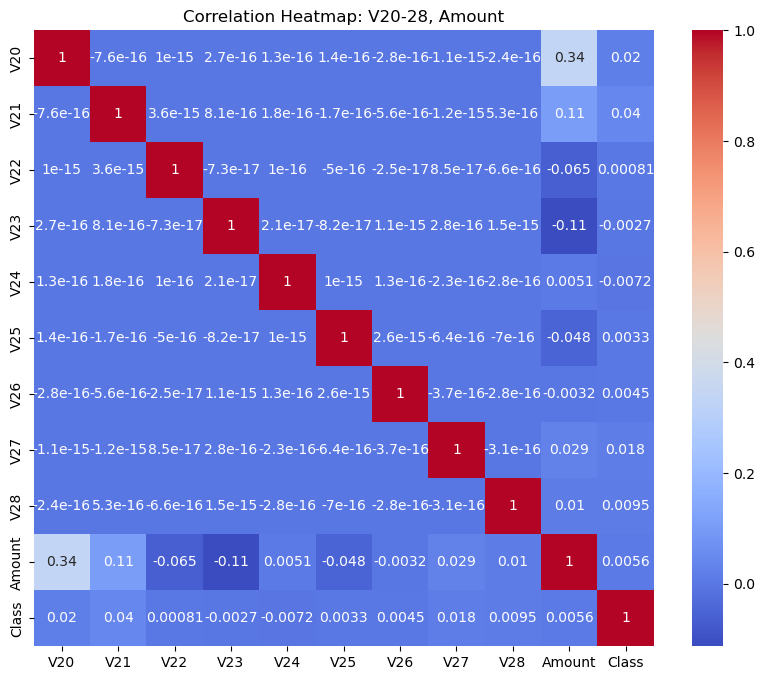

In [24]:
sel_columns = ['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
sel_df = df[sel_columns]
correlation_matrix = sel_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: V20-28, Amount')
plt.show()

Feature: 0, Score: -0.00010
Feature: 1, Score: 0.73038
Feature: 2, Score: -0.67022
Feature: 3, Score: -0.62977
Feature: 4, Score: 0.13405
Feature: 5, Score: 0.10078
Feature: 6, Score: -0.02317
Feature: 7, Score: 0.09435
Feature: 8, Score: -0.21753
Feature: 9, Score: -0.61904
Feature: 10, Score: -0.37379
Feature: 11, Score: -0.08653
Feature: 12, Score: -0.12948
Feature: 13, Score: -0.41102
Feature: 14, Score: -1.13709
Feature: 15, Score: -0.22587
Feature: 16, Score: -0.52622
Feature: 17, Score: -0.99351
Feature: 18, Score: -0.18177
Feature: 19, Score: 0.12720
Feature: 20, Score: 0.04445
Feature: 21, Score: 0.21428
Feature: 22, Score: 0.23006
Feature: 23, Score: 0.01895
Feature: 24, Score: -0.01848
Feature: 25, Score: -0.14808
Feature: 26, Score: 0.03329
Feature: 27, Score: -0.04680
Feature: 28, Score: 0.06531
Feature: 29, Score: -0.00953


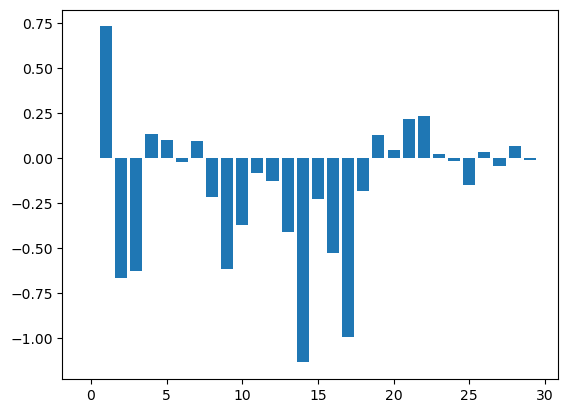

In [25]:
# Logistic Regression for feature importance
from matplotlib import pyplot

model = LogisticRegression()
model.fit(X, y)

importance = model.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01334
Feature: 1, Score: 0.01285
Feature: 2, Score: 0.01240
Feature: 3, Score: 0.01634
Feature: 4, Score: 0.02881
Feature: 5, Score: 0.01205
Feature: 6, Score: 0.01395
Feature: 7, Score: 0.02707
Feature: 8, Score: 0.00974
Feature: 9, Score: 0.03212
Feature: 10, Score: 0.06248
Feature: 11, Score: 0.07844
Feature: 12, Score: 0.14716
Feature: 13, Score: 0.01111
Feature: 14, Score: 0.12486
Feature: 15, Score: 0.00979
Feature: 16, Score: 0.06426
Feature: 17, Score: 0.16384
Feature: 18, Score: 0.02641
Feature: 19, Score: 0.01191
Feature: 20, Score: 0.01266
Feature: 21, Score: 0.01783
Feature: 22, Score: 0.00875
Feature: 23, Score: 0.00853
Feature: 24, Score: 0.01097
Feature: 25, Score: 0.00749
Feature: 26, Score: 0.01982
Feature: 27, Score: 0.01320
Feature: 28, Score: 0.00996
Feature: 29, Score: 0.01185


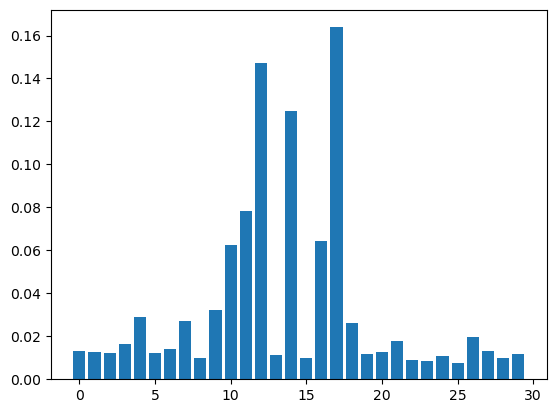

In [26]:
# Random Forest classifier for feature importance
from matplotlib import pyplot

model = RandomForestClassifier()
model.fit(X, y)

importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


**Delete v23,v24,v25 cloumn.**

In [27]:
new_df = df.drop(['V23', 'V24', 'V25'], axis=1)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.121359,-2.261857,0.524980,0.247998,0.771679,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.038195,0.803487,0.408542,-0.009431,0.798278,0.502292,0.219422,0.215153,69.99,0


# **Divide the dataset into features and targets**

In [28]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print("Features (X):")
X.head()

Features (X):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V22,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,0.502292,0.219422,0.215153,69.99


In [30]:
print("\nTarget (y):")
y.head()


Target (y):


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# **Train a baseline model using Random Forest Classifier**
For training dataset, we have used Random Forest Classifier. Because it combines multiple decision trees. It improves model performance by reducing overfitting and capturing more complex relationships. We can see that F1 score, Precision Score and Recall Score are around 70% to 90% that means our model is accurate to 70% to 90%.

In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation scores
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation scores
print("F1 Score:", f1)
print("Precision Score:", precision)
print("Recall Score:", recall)

F1 Score: 0.8700564971751412
Precision Score: 0.9746835443037974
Recall Score: 0.7857142857142857


# **Train model using bagging Classifier**
Bagging, short for bootstrap aggregating, involves training multiple models on different subsets of the training data and combining their predictions to make a final prediction. We have used Bagging Classifier with base estimator as Random Forest Classifier. We can see that F1 score, Precision Score and Recall Score are bit improved by iterating 5 times.

In [32]:
# Initialize lists to store evaluation scores
f1_scores = []
precision_scores = []
recall_scores = []

# Incrementally increase the number of models (from 1 to 5)
for n_estimators in range(1, 5):
    # Initialize the Bagging classifier with Random Forest as the base estimator
    bagging = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                                n_estimators=n_estimators,
                                random_state=42)
    
    # Train the Bagging classifier
    bagging.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = bagging.predict(X_test)
    
    # Calculate evaluation scores
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append the scores to the lists
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the evaluation scores for different numbers of models
for i in range(len(f1_scores)):
    print("Number of Models:", i+1)
    print("F1 Score:", f1_scores[i])
    print("Precision Score:", precision_scores[i])
    print("Recall Score:", recall_scores[i])
    print()

Number of Models: 1
F1 Score: 0.8342857142857143
Precision Score: 0.948051948051948
Recall Score: 0.7448979591836735

Number of Models: 2
F1 Score: 0.8361581920903955
Precision Score: 0.9367088607594937
Recall Score: 0.7551020408163265

Number of Models: 3
F1 Score: 0.8409090909090908
Precision Score: 0.9487179487179487
Recall Score: 0.7551020408163265

Number of Models: 4
F1 Score: 0.839080459770115
Precision Score: 0.9605263157894737
Recall Score: 0.7448979591836735



# **Train model using AdaBoost Classifier**
Boosting combines multiple weak models in a sequential manner, where each subsequent model tries to correct the mistakes made by the previous models. We used AdaBoost classifier with base estimator as Random Forest Classifier. We can see that F1 score, Precision Score and Recall Score are better than Begging classifier and base line model.

In [33]:
# Initialize lists to store evaluation scores
f1_scores = []
precision_scores = []
recall_scores = []

# Incrementally increase the number of models (from 1 to 5)
for n_estimators in range(1, 5):
    # Initialize the AdaBoost classifier with Random Forest as the base estimator
    boosting = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),
                                  n_estimators=n_estimators,
                                  random_state=42)
    
    # Train the AdaBoost classifier
    boosting.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = boosting.predict(X_test)
    
    # Calculate evaluation scores
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append the scores to the lists
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the evaluation scores for different numbers of models
for i in range(len(f1_scores)):
    print("Number of Models:", i+1)
    print("F1 Score:", f1_scores[i])
    print("Precision Score:", precision_scores[i])
    print("Recall Score:", recall_scores[i])
    print()

Number of Models: 1
F1 Score: 0.8636363636363635
Precision Score: 0.9743589743589743
Recall Score: 0.7755102040816326

Number of Models: 2
F1 Score: 0.8636363636363635
Precision Score: 0.9743589743589743
Recall Score: 0.7755102040816326

Number of Models: 3
F1 Score: 0.8636363636363635
Precision Score: 0.9743589743589743
Recall Score: 0.7755102040816326

Number of Models: 4
F1 Score: 0.8636363636363635
Precision Score: 0.9743589743589743
Recall Score: 0.7755102040816326



# **Hyperparameter Tuning of AdaBoost Classifier**

We performs hyperparameter tuning for an AdaBoostClassifier with a base estimator of RandomForestClassifier.

The parameter grid **param_grid** is defined, specifying the hyperparameters to be tuned. It includes the number of base estimators (n_estimators), the maximum depth of the base estimator (base_estimator__max_depth), and the minimum number of samples required to split in the base estimator (base_estimator__min_samples_split).

**n_estimators:** This parameter represents the number of base estimators (weak learners) used in the AdaBoost ensemble. In our case, we are considering values of 3 and 7. By tuning this parameter, we can explore how the performance of the AdaBoost classifier varies with different numbers of base estimators.

**base_estimator__max_depth:** This parameter corresponds to the maximum depth of each base estimator, which is a Random Forest classifier in our case. We are considering values of 3 and 5. By tuning this parameter, we can control the complexity of each base estimator and assess its impact on the overall ensemble.

**base_estimator__min_samples_split:** This parameter determines the minimum number of samples required to split an internal node in the base estimator (Random Forest). We are considering values of 2 and 5. By tuning this parameter, we can regulate the granularity of the base estimator's decision-making process.

By performing Grid search cross-validation **GridSearchCV** with the specified hyperparameter grid, scoring metric (F1 score), and cross-validation folds. The fit method is called on the grid search object with the training data (X_train and y_train).

We can see that F1 score is bit improved by tuning hyperparameters.

Also Best Hyperparametes are n_estimator=7, max_depth=5, min_sample_split=2.

We can clearly se  by line graph that indicates f1 score with different hyperparameters. 

Best Hyperparameters: {'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 2, 'n_estimators': 7}
F1 Score: 0.8685714285714285
Precision: 0.987012987012987
Recall: 0.7755102040816326


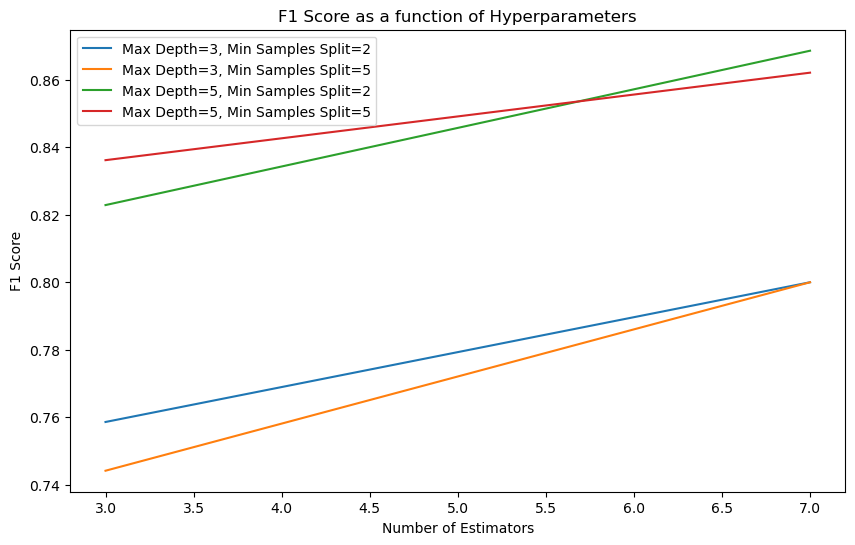

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [3, 7],  # Number of base estimators
    'base_estimator__max_depth': [3, 5],  # Max depth of the base estimator (Random Forest)
    'base_estimator__min_samples_split': [2, 5]  # Min samples required to split in the base estimator
}

# Initialize the AdaBoost classifier with Random Forest as the base estimator
base_estimator = RandomForestClassifier(random_state=42)
boosting = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(boosting, param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation scores
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plotting the performance graph
# Define the hyperparameter values
n_estimators_values = param_grid['n_estimators']
max_depth_values = param_grid['base_estimator__max_depth']
min_samples_split_values = param_grid['base_estimator__min_samples_split']

# Initialize lists to store F1 scores
f1_scores = []

# Iterate over the hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            # Train the model and make predictions
            boosting.set_params(n_estimators=n_estimators,
                                base_estimator__max_depth=max_depth,
                                base_estimator__min_samples_split=min_samples_split)
            boosting.fit(X_train, y_train)
            y_pred = boosting.predict(X_test)

            # Calculate the F1 score
            f1 = f1_score(y_test, y_pred)

            # Append the F1 score to the list
            f1_scores.append(f1)

# Reshape the F1 scores to match the hyperparameter grid
f1_scores = np.array(f1_scores).reshape(len(n_estimators_values), len(max_depth_values), len(min_samples_split_values))

# Plot the line graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Plot lines for each max_depth value
for i, max_depth in enumerate(max_depth_values):
    for j, min_samples_split in enumerate(min_samples_split_values):
        ax.plot(n_estimators_values, f1_scores[:, i, j], label=f"Max Depth={max_depth}, Min Samples Split={min_samples_split}")

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score as a function of Hyperparameters')
ax.legend()
plt.show()

# **Performs various analysis and evaluation tasks on the predictions made by a trained model**

We can see that the model achieved an **accuracy** of approximately 99.96%

A **precision** of 0.987 means that out of all the instances predicted as frauds, approximately 98.7% were actually frauds.

A **recall** of 0.776 indicates that the model captured approximately 77.6% of the actual fraud cases.

The **F1 score** of 0.869 indicates a reasonably good balance between precision and recall.

The classification report provides a more detailed summary of the model's performance:

**Class 0 (Non-fraud):**
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Support: 56864
This indicates that the model performed exceptionally well in predicting non-fraud instances, achieving perfect precision, recall, and F1 score.

**Class 1 (Fraud):**
Precision: 0.99
Recall: 0.78
F1-Score: 0.87
Support: 98
The model achieved a high precision of 0.99 for fraud instances, indicating a low false positive rate. However, the recall of 0.78 suggests that it missed some fraud cases.

The macro average and weighted average provide overall performance measures across both classes. The **macro average** calculates the unweighted average of precision, recall, and F1 score, while the **weighted average** considers the class support (number of instances) as weights.

Accuracy: 0.9995962220427653
Precision: 0.987012987012987
Recall: 0.7755102040816326
F1 Score: 0.8685714285714285


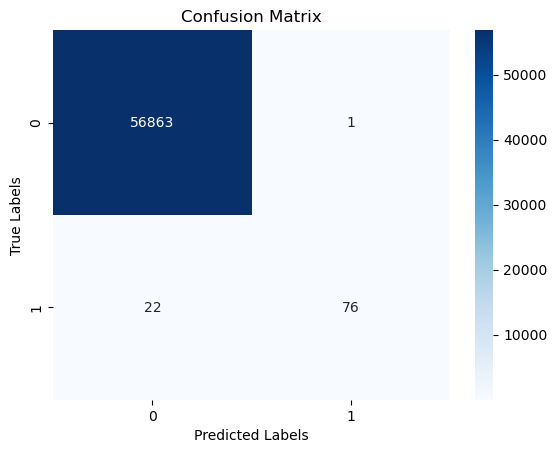

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [47]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Analyze the prediction results
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# **Create CSV file for pridicted values**

In [48]:
# Create a DataFrame with the predicted labels and original labels
results = pd.DataFrame({'Predicted Labels': y_pred, 'Original Labels': y_test})

# Save the DataFrame to a CSV file
results.to_csv('predictions.csv', index=False)

# **Referance**

[1] “GridSearchCV,” scikit, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html (accessed Jun. 16, 2023).

[2] “AdaBoostClassifier,” scikit, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html (accessed Jun. 16, 2023).

[3] “BaggingClassifier,” scikit, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html (accessed Jun. 16, 2023).

[4] “Feature importances with a forest of trees,” scikit, https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html (accessed Jun. 16, 2023).

[5] “LinearRegression,” scikit, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html (accessed Jun. 16, 2023).

[6] S. Kohli, “Understanding a classification report for your machine learning model,” Medium, https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397 (accessed Jun. 16, 2023). 